In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
%matplotlib inline

In [3]:
#create two samples
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample1 = np.random.choice(pop1, 100)
sample2 = np.random.choice(pop2, 100)

#mean and std of each sample
m1 = sample1.mean()
sd1 = sample1.std()
m2 = sample2.mean()
sd2 = sample2.std()

print("The mean of population1 is {} and its standard dev is {}".format(pop1.mean(), pop1.std()))
print("The mean of population2 is {} and its standard dev is {}".format(pop2.mean(), pop2.std()))
print("The mean of sample1 is {} and its standard dev is {}".format(m1, sd1))
print("The mean of sample2 is {} and its standard dev is {}".format(m2, sd2))


The mean of population1 is 2.0053 and its standard dev is 1.2597110422632645
The mean of population2 is 5.0074 and its standard dev is 1.5890705585341387
The mean of sample1 is 1.84 and its standard dev is 1.3908270920570966
The mean of sample2 is 4.99 and its standard dev is 1.6093166251549134


1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

I would expect the means to be closer to the population means. When the sample size is reduced to 20 the means should be further away from the population means with larger standard deviation.

In [4]:
sample1a = np.random.choice(pop1, 1000)
sample2a = np.random.choice(pop2, 1000)

m1a = sample1a.mean()
sd1a = sample1a.std()
m2a = sample2a.mean()
sd2a = sample2a.std()

print("The mean of sample 1a is {} and its standard dev is {}".format(m1a, sd1a))
print("The mean of sample 2a is {} and its standard dev is {}".format(m2a, sd2a))

The mean of sample 1a is 2.01 and its standard dev is 1.2368912644206038
The mean of sample 2a is 5.05 and its standard dev is 1.61291661284767


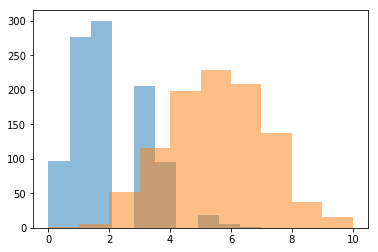

In [5]:
plt.hist(sample1a, alpha=0.5)
plt.hist(sample2a, alpha=0.5)
plt.show()

In [6]:
sample1b = np.random.choice(pop1, 20)
sample2b = np.random.choice(pop2, 20)

m1b = sample1b.mean()
sd1b = sample1b.std()
m2b = sample2b.mean()
sd2b = sample2b.std()

print("The mean of sample 1b is {} and its standard dev is {}".format(m1b, sd1b))
print("The mean of sample 2b is {} and its standard dev is {}".format(m2b, sd2b))

The mean of sample 1b is 1.55 and its standard dev is 0.9205976319760985
The mean of sample 2b is 4.7 and its standard dev is 1.307669683062202


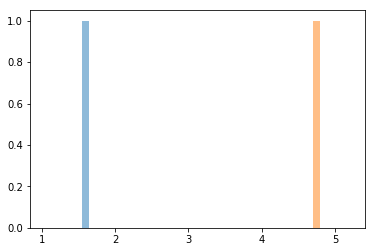

In [7]:
plt.hist(m1b, alpha=0.5)
plt.hist(m2b, alpha=0.5)
plt.show()

2. Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

In [8]:
#create two samples
pop1new = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10, 0.5, 10000)

sample1new = np.random.choice(pop1new, 100)
sample2 = np.random.choice(pop2, 100)

#mean and std of each sample
m1new = sample1new.mean()
sd1new = sample1new.std()
m2 = sample2.mean()
sd2 = sample2.std()

print("The mean of population1new is {} and its standard dev is {}".format(pop1new.mean(), pop1new.std()))
print("The mean of population2 is {} and its standard dev is {}".format(pop2.mean(), pop2.std()))
print("The mean of sample1new is {} and its standard dev is {}".format(m1new, sd1new))
print("The mean of sample2 is {} and its standard dev is {}".format(m2, sd2))

The mean of population1new is 4.0203 and its standard dev is 1.5662336703059347
The mean of population2 is 4.9864 and its standard dev is 1.586573364203496
The mean of sample1new is 3.67 and its standard dev is 1.594082808388573
The mean of sample2 is 5.19 and its standard dev is 1.585528303121707


In [9]:
size = np.array([len(sample1new), len(sample2)])
sd = np.array([sample1new.std(), sample2.std()])

def mult(arr_a, arr_b):
    return arr_a[0]**2 / arr_b[0] + arr_a[1]**2 / arr_b[1]

#Squared standard deviations divided by the square root of the sum
diff_se = (mult(sd, size)) ** 0.5
y_bar = m2 - m1new
print("diff_se = {}".format(diff_se))
print("y_bar = {}".format(y_bar))
print("Our t-value is {}".format(y_bar / diff_se))

diff_se = 0.22483327155917113
y_bar = 1.5200000000000005
Our t-value is 6.760565237783191


In [10]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1new, equal_var=False))

#If p(pop1new)=0.3,p(pop2)=0.5:
#The mean of population1new is 3.0319 and its standard dev is 1.4579720127629336
#The mean of population2 is 4.986 and its standard dev is 1.5790516141025916
#The mean of sample1new is 3.1 and its standard dev is 1.4730919862656238
#The mean of sample2 is 4.94 and its standard dev is 1.6722440013347335
#diff_se = 0.22285421243494594
#y_bar = 1.8400000000000003
#Our t-value is 8.256518824103988
#Ttest_indResult(statistic=8.2151325042177916, pvalue=2.8919746382381763e-14)

#If p(pop1new)=0.3,p(pop2)=0.5:
#The mean of population1new is 3.9862 and its standard dev is 1.5555737076718674
#The mean of population2 is 5.0081 and its standard dev is 1.5865164323132617
#The mean of sample1new is 3.97 and its standard dev is 1.5195723082499235
#The mean of sample2 is 4.7 and its standard dev is 1.7464249196572978
#diff_se = 0.23149730020023992
#y_bar = 0.73
#Our t-value is 3.1533845075884965
#Ttest_indResult(statistic=3.1375779694171992, pvalue=0.0019686624785378616)

Ttest_indResult(statistic=6.7266774793340032, pvalue=1.8206021271486989e-10)


Increasing the probablility of the first population has reduced the t-value, while significantly increasing the p-value. 

## Change the Distribution to Normal and Repeat

In [11]:
#create two samples
pop1norm = np.random.normal(70, 15, 10000)
pop2norm = np.random.normal(25, 7, 10000)

sample1norm = np.random.choice(pop1norm, 1000)
sample2norm = np.random.choice(pop2norm, 1000)

#mean and std of each sample
m1norm = sample1norm.mean()
sd1norm = sample1norm.std()
m2norm = sample2norm.mean()
sd2norm = sample2norm.std()

print("The mean of population1norm is {} and its standard dev is {}".format(pop1norm.mean(), pop1norm.std()))
print("The mean of population2norm is {} and its standard dev is {}".format(pop2norm.mean(), pop2norm.std()))
print("The mean of sample1norm is {} and its standard dev is {}".format(m1norm, sd1norm))
print("The mean of sample2norm is {} and its standard dev is {}".format(m2norm, sd2norm))

The mean of population1norm is 69.93641154850401 and its standard dev is 14.991046958406956
The mean of population2norm is 24.983714042004415 and its standard dev is 6.974773446507188
The mean of sample1norm is 69.57172890155914 and its standard dev is 15.206717079048149
The mean of sample2norm is 24.921214359917577 and its standard dev is 6.982708363458022


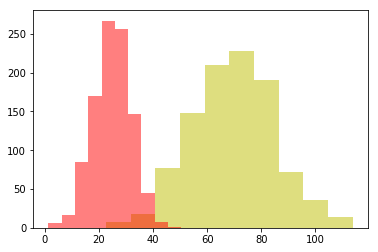

In [12]:
plt.hist(sample1norm, color='y', alpha=0.5)
plt.hist(sample2norm, color='r', alpha=0.5)
plt.show()

In [14]:
size_norm = np.array([len(sample1norm), len(sample2norm)])
sd_norm = np.array([sample1norm.std(), sample2norm.std()])

def mult(arr_a, arr_b):
    return arr_a[0]**2 / arr_b[0] + arr_a[1]**2 / arr_b[1]

#Squared standard deviations divided by the square root of the sum
diff_se_norm = (mult(sd_norm, size_norm)) ** 0.5
y_bar_norm = m2norm - m1norm
print("diff_se = {}".format(diff_se_norm))
print("y_bar = {}".format(y_bar_norm))
print("Our t-value is {}".format(y_bar_norm / diff_se_norm))

diff_se = 0.529152587077982
y_bar = -44.65051454164156
Our t-value is -84.38117025602173


In [16]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2norm, sample1norm, equal_var=False))

Ttest_indResult(statistic=-84.338969117970308, pvalue=0.0)


The sample mean values well represent the population mean values.